In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sb

In [ ]:
df = pd.read_csv('data/stage1_loans.csv')

In [ ]:
# df.dtypes

### Finding Correlation 
Using Pearson, trying to find association between columns

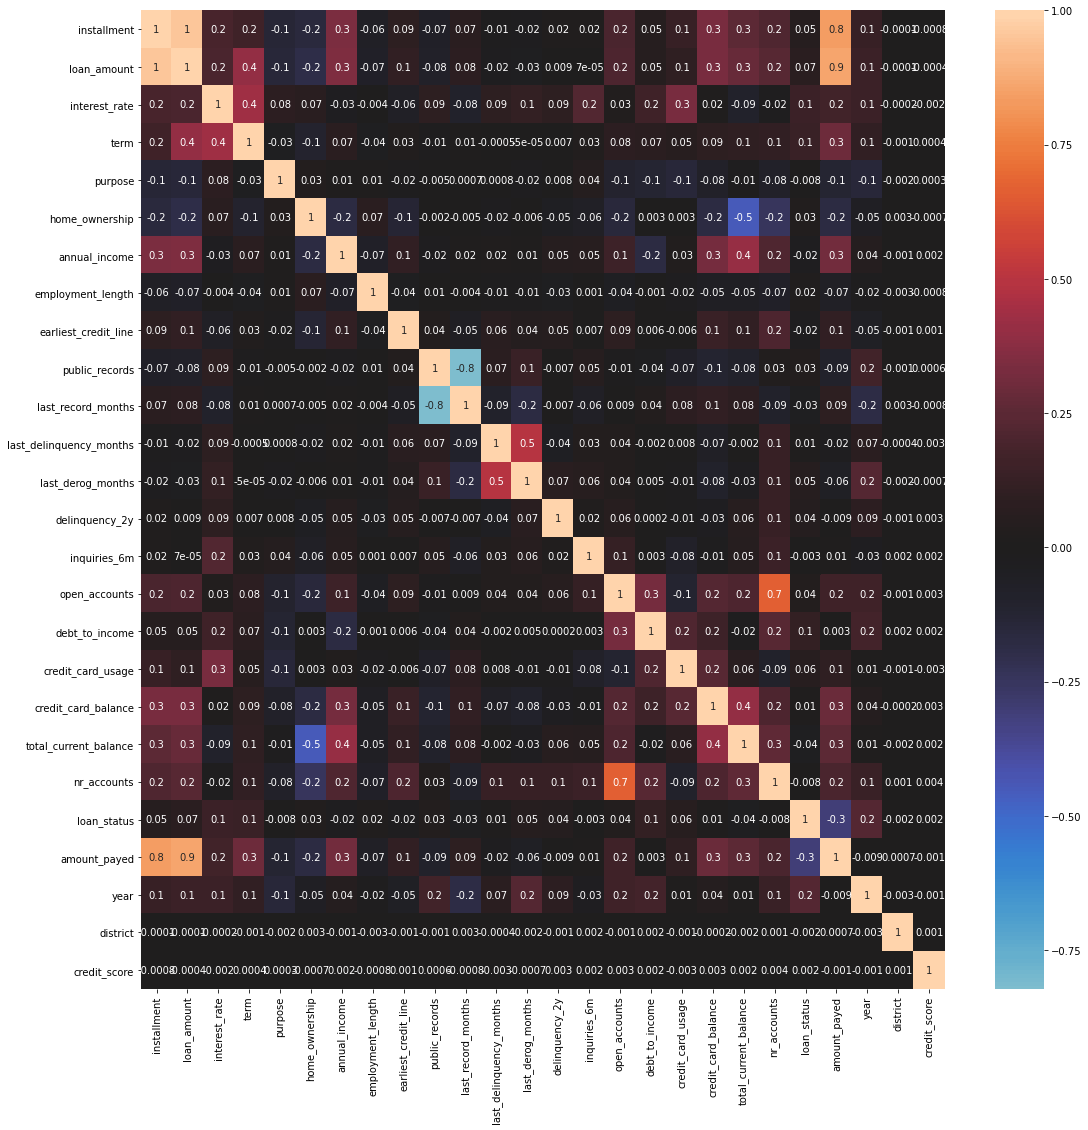

In [4]:
pearsoncorr = df.corr().abs()
plt.figure(figsize = (18,18))
sb.heatmap(df.corr(), annot = True, fmt='.1g', center= 0)

As seen from above heatmap, columns such as loan_amount, amount_payed, last_record_months are highly correlated with installment and public records, thus, removing the is essential.

Removed Cols:  {'loan_amount', 'amount_payed', 'last_record_months'}


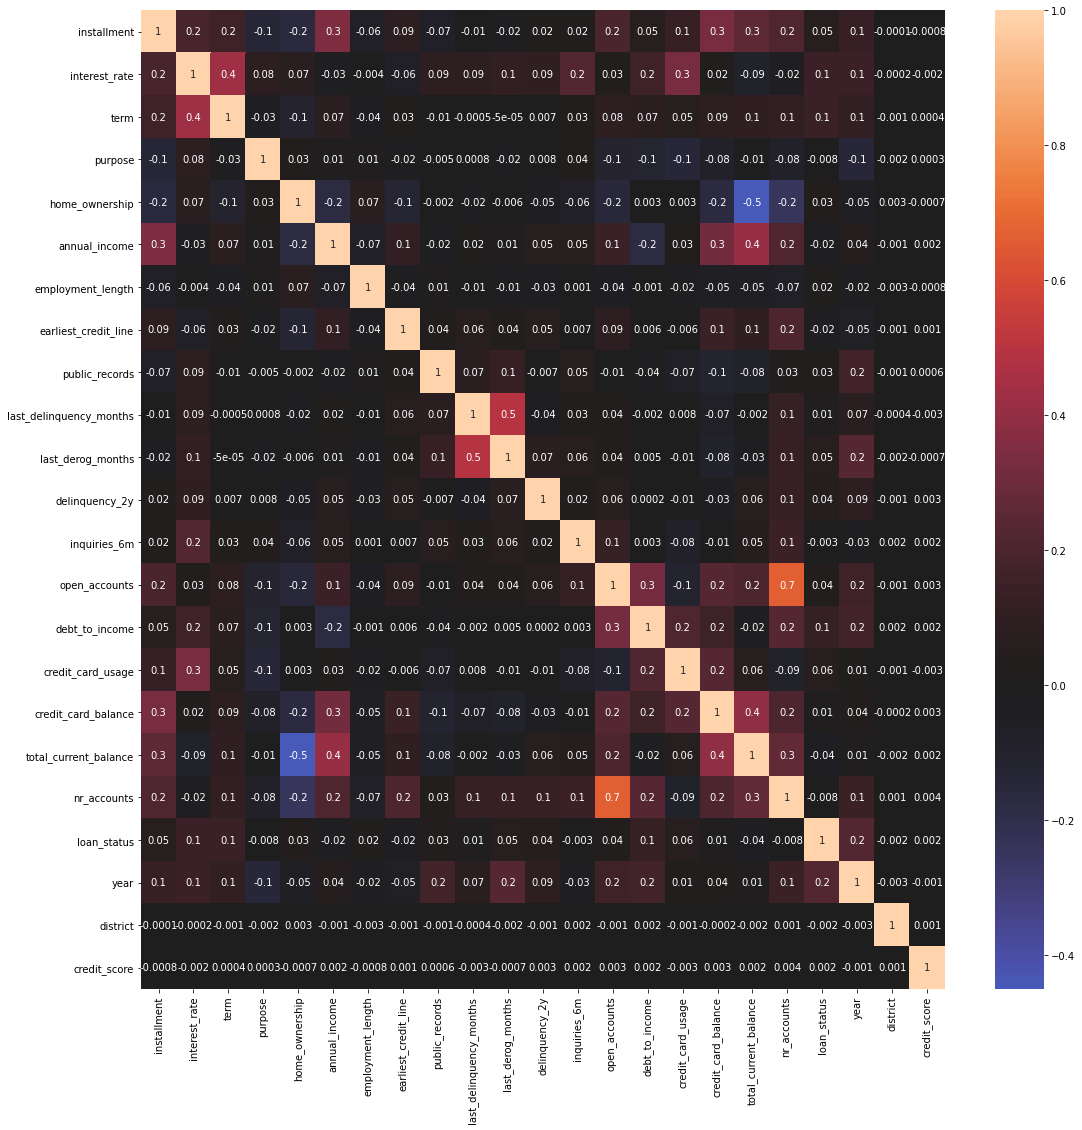

In [5]:
plt.figure(figsize = (18,18))
def uncorrelated_features(df, threshold=0.7):
    """
    Returns a subset of df columns with Pearson correlations
    below threshold.
    """

    corr = df.corr().abs()
    keep = []
    for i in range(len(corr.iloc[:,0])):
        above = corr.iloc[:i,i]
        if len(keep) > 0: above = above[keep]
        if len(above[above < threshold]) == len(above):
            keep.append(corr.columns.values[i])

    return df[keep],keep
original_cols = list(df.columns)
df,cols_kept = uncorrelated_features(df, threshold=0.7)
print("Removed Cols: ",str(set(original_cols) - set(cols_kept)))
sb.heatmap(df.corr(), annot = True, fmt='.1g', center= 0)

In [6]:
df.to_csv("stage2_loans.csv", index=False)

In [7]:
df.shape

(237395, 23)